In [2]:
import sys
sys.path.insert(1, '../') # make sure to use the code in this repo


import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits

import matplotlib as mpl
# try to use the precise epoch
mpl.rcParams['date.epoch']='1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

%load_ext autoreload
%autoreload 2

In [100]:
#'output2/L700161_SAP000_B000_S0_P000_bf/LOFAR_20190403_081500_LBA_OUTER.fits'
fname = r'D://vult/nacad/2022_b/IDOLS/L857852_SAP000_B000_S0_P000_bf/LOFAR_20220413_131000_LBA_OUTER.fits'
hdu = fits.open(fname)
dyspec = hdu[0].data
f_fits = hdu[1].data['FREQ'][:]
t_fits = hdu[2].data['TIME'][:]


In [101]:
t_fits.shape # frequency channels 

(597,)

In [106]:
# bandpass with 3%-20% partion of each channel (representing quiet time)
bandpass_arr = [np.mean(tmp[np.where((tmp>np.sort(tmp)[int(0.03*tmp.shape[0])]) 
                     & (tmp<np.sort(tmp)[int(0.2*tmp.shape[0])]))])  for tmp in list(dyspec.T)]

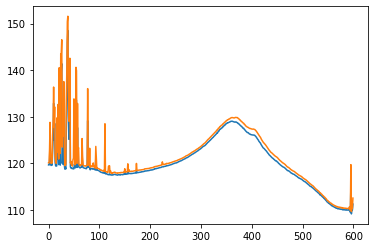

In [107]:
plt.plot(bandpass_arr) # the bandpass of quiet time
plt.plot(np.mean(dyspec,0)) # simple averaging bandpass

Text(0.5, 1.0, '2022/04/13 Radio Flux Intensity LOFAR LBA_OUTER')

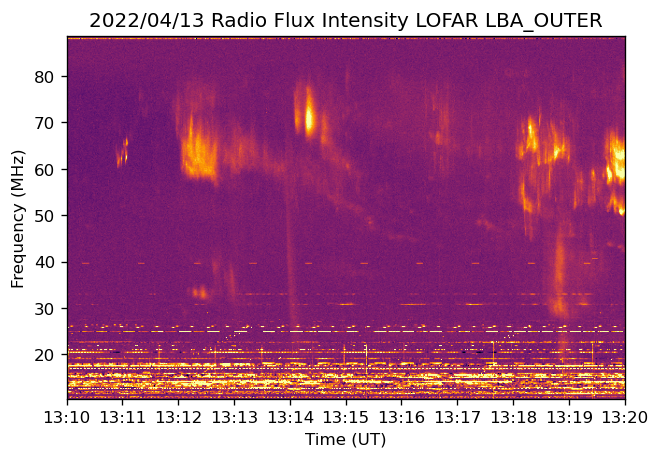

In [114]:

data_fits_new = dyspec-np.tile(np.mean(dyspec,0),(dyspec.shape[0],1))
data_fits_new = dyspec-np.tile(bandpass_arr,(dyspec.shape[0],1))


fig = plt.figure(figsize=(6, 4), dpi=120)
ax = plt.gca()
ax.imshow(data_fits_new.T,aspect='auto',  origin='lower', 
                   vmin=(np.mean(data_fits_new)-2*np.std(data_fits_new)),
                   vmax=(np.mean(data_fits_new)+3*np.std(data_fits_new)),
                   extent=[t_fits[0],t_fits[-1],f_fits[0],f_fits[-1]],cmap='inferno')


ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(hdu[0].header['CONTENT'])



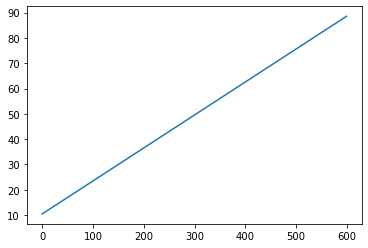

In [93]:
plt.plot(f_fits) # frequency not continous

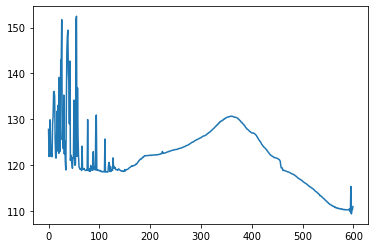

In [22]:
#bandpass
plt.plot((np.mean(np.ma.masked_array(dyspec, ((dyspec>range_lower) & (dyspec<range_upper))),0),(dyspec.shape[0],1))[0].data)